In [1]:
from sklearn.datasets import load_digits #import the dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
digits = load_digits()

<Figure size 640x480 with 0 Axes>

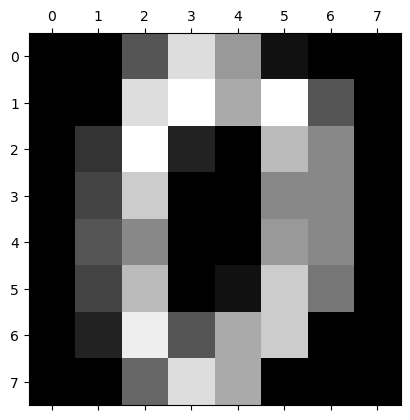

In [3]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [4]:
# Print the shapes of images and data
print("Shape of images:", digits.images.shape)  
print("Shape of data:", digits.data.shape)       

Shape of images: (1797, 8, 8)
Shape of data: (1797, 64)


In [5]:
# Initialize the scaler
scaler = StandardScaler()

In [6]:
# Use the flattened data as inputs and the original labels as targets
inputs = digits.data
targets = digits.target

In [7]:
inputs = scaler.fit_transform(inputs) 

In [8]:
# One-hot encode the targets by creating a new array
onehot_targets = np.zeros((targets.shape[0], 10))

for i in range(targets.shape[0]):
    onehot_targets[i, targets[i]] = 1


In [9]:
onehot_targets

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [10]:
# Split the dataset into training and testing sets (80% train, 20% test).
X_train, X_test, y_train, y_test = train_test_split(inputs, onehot_targets, test_size = 0.2, random_state = 42)

In [11]:
class NeuralNetwork:
    def __init__(self, input_size = 64, hidden_size = 30, output_size = 10, learning_rate = 0.01, epochs = 1000):
        # Hyperparameters
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        # Weights & bias initialization with small random values
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01  
        self.b1 = np.zeros((1, hidden_size))                       
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01 
        self.b2 = np.zeros((1, output_size))                       #

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def ReLU(self, x):
        return np.maximum(0, x)

    def ReLU_deriv(self, x):
        return np.where(x > 0, 1, 0)

    def tanh(self, x):
        return np.tanh(x)

    def tanh_deriv(self, x):
        return 1 - (self.tanh(x))**2

    def forward_propagation(self, x, activation):
        # Hidden layer
        z1 = x @ self.W1 + self.b1
        a1 = activation(z1)
    
        # Output layer
        z2 = a1 @ self.W2 + self.b2
        a2 = activation(z2)
    
        return z1, a1, z2, a2

    def compute_cost(self, y_pred, y_true):
        cost = np.mean((y_pred - y_true) ** 2)
        return cost

    def back_propagation(self, x, y, activation, activation_derivative):       
        m = y.shape[0]
        
        z1, a1, z2, a2 = self.forward_propagation(x, activation)
        
        error2 = 2 * (a2 - y) * activation_derivative(z2)
        grad_W2 = (a1.T @ error2) / m
        grad_b2 = np.sum(error2, axis = 0, keepdims = True) / m

        error1 = (error2 @ self.W2.T) * activation_derivative(z1)
        grad_W1 = (x.T @ error1) / m
        grad_b1 = np.sum(error1, axis = 0, keepdims = True) / m

        return grad_W1, grad_b1, grad_W2, grad_b2

    def update_parameters(self, grad_W1, grad_b1, grad_W2, grad_b2):
        self.W2 = self.W2 - (self.learning_rate * grad_W2)
        self.b2 = self.b2 - (self.learning_rate * grad_b2)
        self.W1 = self.W1 - (self.learning_rate * grad_W1)
        self.b1 = self.b1 - (self.learning_rate * grad_b1)


    def train(self, x, y, activation, activation_derivative):
        for epoch in range(self.epochs):
            z1, a1, z2, a2 = self.forward_propagation(x, activation)
            grad_W1, grad_b1, grad_W2, grad_b2 = self.back_propagation(x, y, activation, activation_derivative)
            self.update_parameters(grad_W1, grad_b1, grad_W2, grad_b2)

            if (epoch%100 == 0):
                cost = self.compute_cost(a2, y)
                print(f"Epoch {epoch}, Cost: {cost}")

    def predict(self, x, activation):
        _ , _ , _ , a2 = self.forward_propagation(x, activation)
        predictions = np.argmax(a2, axis = 1)
        return predictions

    def accuracy_score(self, y_true, y_pred):
        return accuracy_score(y_true, y_pred)

In [12]:
# Neural Network with Sigmoid activation

net_sigmoid = NeuralNetwork(learning_rate = 0.01, epochs = 1000)
net_sigmoid.train(X_train, y_train, activation = net_sigmoid.sigmoid, activation_derivative = net_sigmoid.sigmoid_deriv)
y_test_labels = np.argmax(y_test, axis=1)
predictions = net_sigmoid.predict(X_test, activation = net_sigmoid.sigmoid)
acc_sigmoid = net_sigmoid.accuracy_score(y_test_labels, predictions)
print("Sigmoid Test Accuracy:", acc_sigmoid)

Epoch 0, Cost: 0.25246469528904264
Epoch 100, Cost: 0.11795191411078527
Epoch 200, Cost: 0.09953016127401482
Epoch 300, Cost: 0.09438968044481354
Epoch 400, Cost: 0.09234192722331548
Epoch 500, Cost: 0.09135721034407938
Epoch 600, Cost: 0.09082623119651938
Epoch 700, Cost: 0.09051711570817286
Epoch 800, Cost: 0.09032698537276566
Epoch 900, Cost: 0.09020503733770992
Sigmoid Test Accuracy: 0.07777777777777778


In [13]:
# Neural Network with ReLU activation

net_ReLU = NeuralNetwork(learning_rate = 0.01, epochs = 1000)
net_ReLU.train(X_train, y_train, activation = net_ReLU.ReLU, activation_derivative = net_ReLU.ReLU_deriv)
y_test_labels = np.argmax(y_test, axis=1)
predictions = net_ReLU.predict(X_test, activation = net_ReLU.ReLU)
acc_ReLU = net_ReLU.accuracy_score(y_test_labels, predictions)
print("ReLU Test Accuracy:", acc_ReLU)

Epoch 0, Cost: 0.09987543220111288
Epoch 100, Cost: 0.08980117954260194
Epoch 200, Cost: 0.08482147860847465
Epoch 300, Cost: 0.0726795093463526
Epoch 400, Cost: 0.05836017184214729
Epoch 500, Cost: 0.04710174290837462
Epoch 600, Cost: 0.03896260779355353
Epoch 700, Cost: 0.03341575706917951
Epoch 800, Cost: 0.02957894470453575
Epoch 900, Cost: 0.026802076561861357
ReLU Test Accuracy: 0.8472222222222222


In [14]:
# Neural Network with tanh activation

net_tanh = NeuralNetwork(learning_rate = 0.01, epochs = 1000)
net_tanh.train(X_train, y_train, activation = net_tanh.tanh, activation_derivative = net_tanh.tanh_deriv)
y_test_labels = np.argmax(y_test, axis=1)
predictions = net_tanh.predict(X_test, activation = net_tanh.tanh)
acc_tanh = net_tanh.accuracy_score(y_test_labels, predictions)
print("tanh Test Accuracy:", acc_tanh)

Epoch 0, Cost: 0.10004436119003264
Epoch 100, Cost: 0.08347722805858385
Epoch 200, Cost: 0.06822620984669812
Epoch 300, Cost: 0.05909022005640055
Epoch 400, Cost: 0.052150125120507505
Epoch 500, Cost: 0.04688084601004273
Epoch 600, Cost: 0.043251061146146685
Epoch 700, Cost: 0.040827709262167826
Epoch 800, Cost: 0.039233078560271764
Epoch 900, Cost: 0.03816494210618945
tanh Test Accuracy: 0.9444444444444444


# Experimenting with Different Hyperparameters